<a href="https://colab.research.google.com/github/AlessioPeluso/wine_classifier/blob/master/wine_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine classification

Supervised analysis on the [wine](https://www.kaggle.com/brynja/wineuci) dataset of kaggle. This dataset was created for testing out different classifiers.
>"This data set is the result of a chemical analysis of wines   grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines"

---

We begin importing the dataset and renaming the columns 

In [21]:
import pandas as pd 

wine = pd.read_csv('/Wine.csv')
wine.columns = [
    'Label', 
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity of ash',
    'Magnesium',
    'Total phenols',
    'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity',
    'Hue',
    'OD280/OD315 of diluted wines',
    'Proline']
    
wine.head()

,Label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


Unfortunately the wine labels are just [1,2,3] and not the wine names.

---

## Data Visualization

Now let's plot some graphs to look how those features are related. 

Let's look at the pairplot.

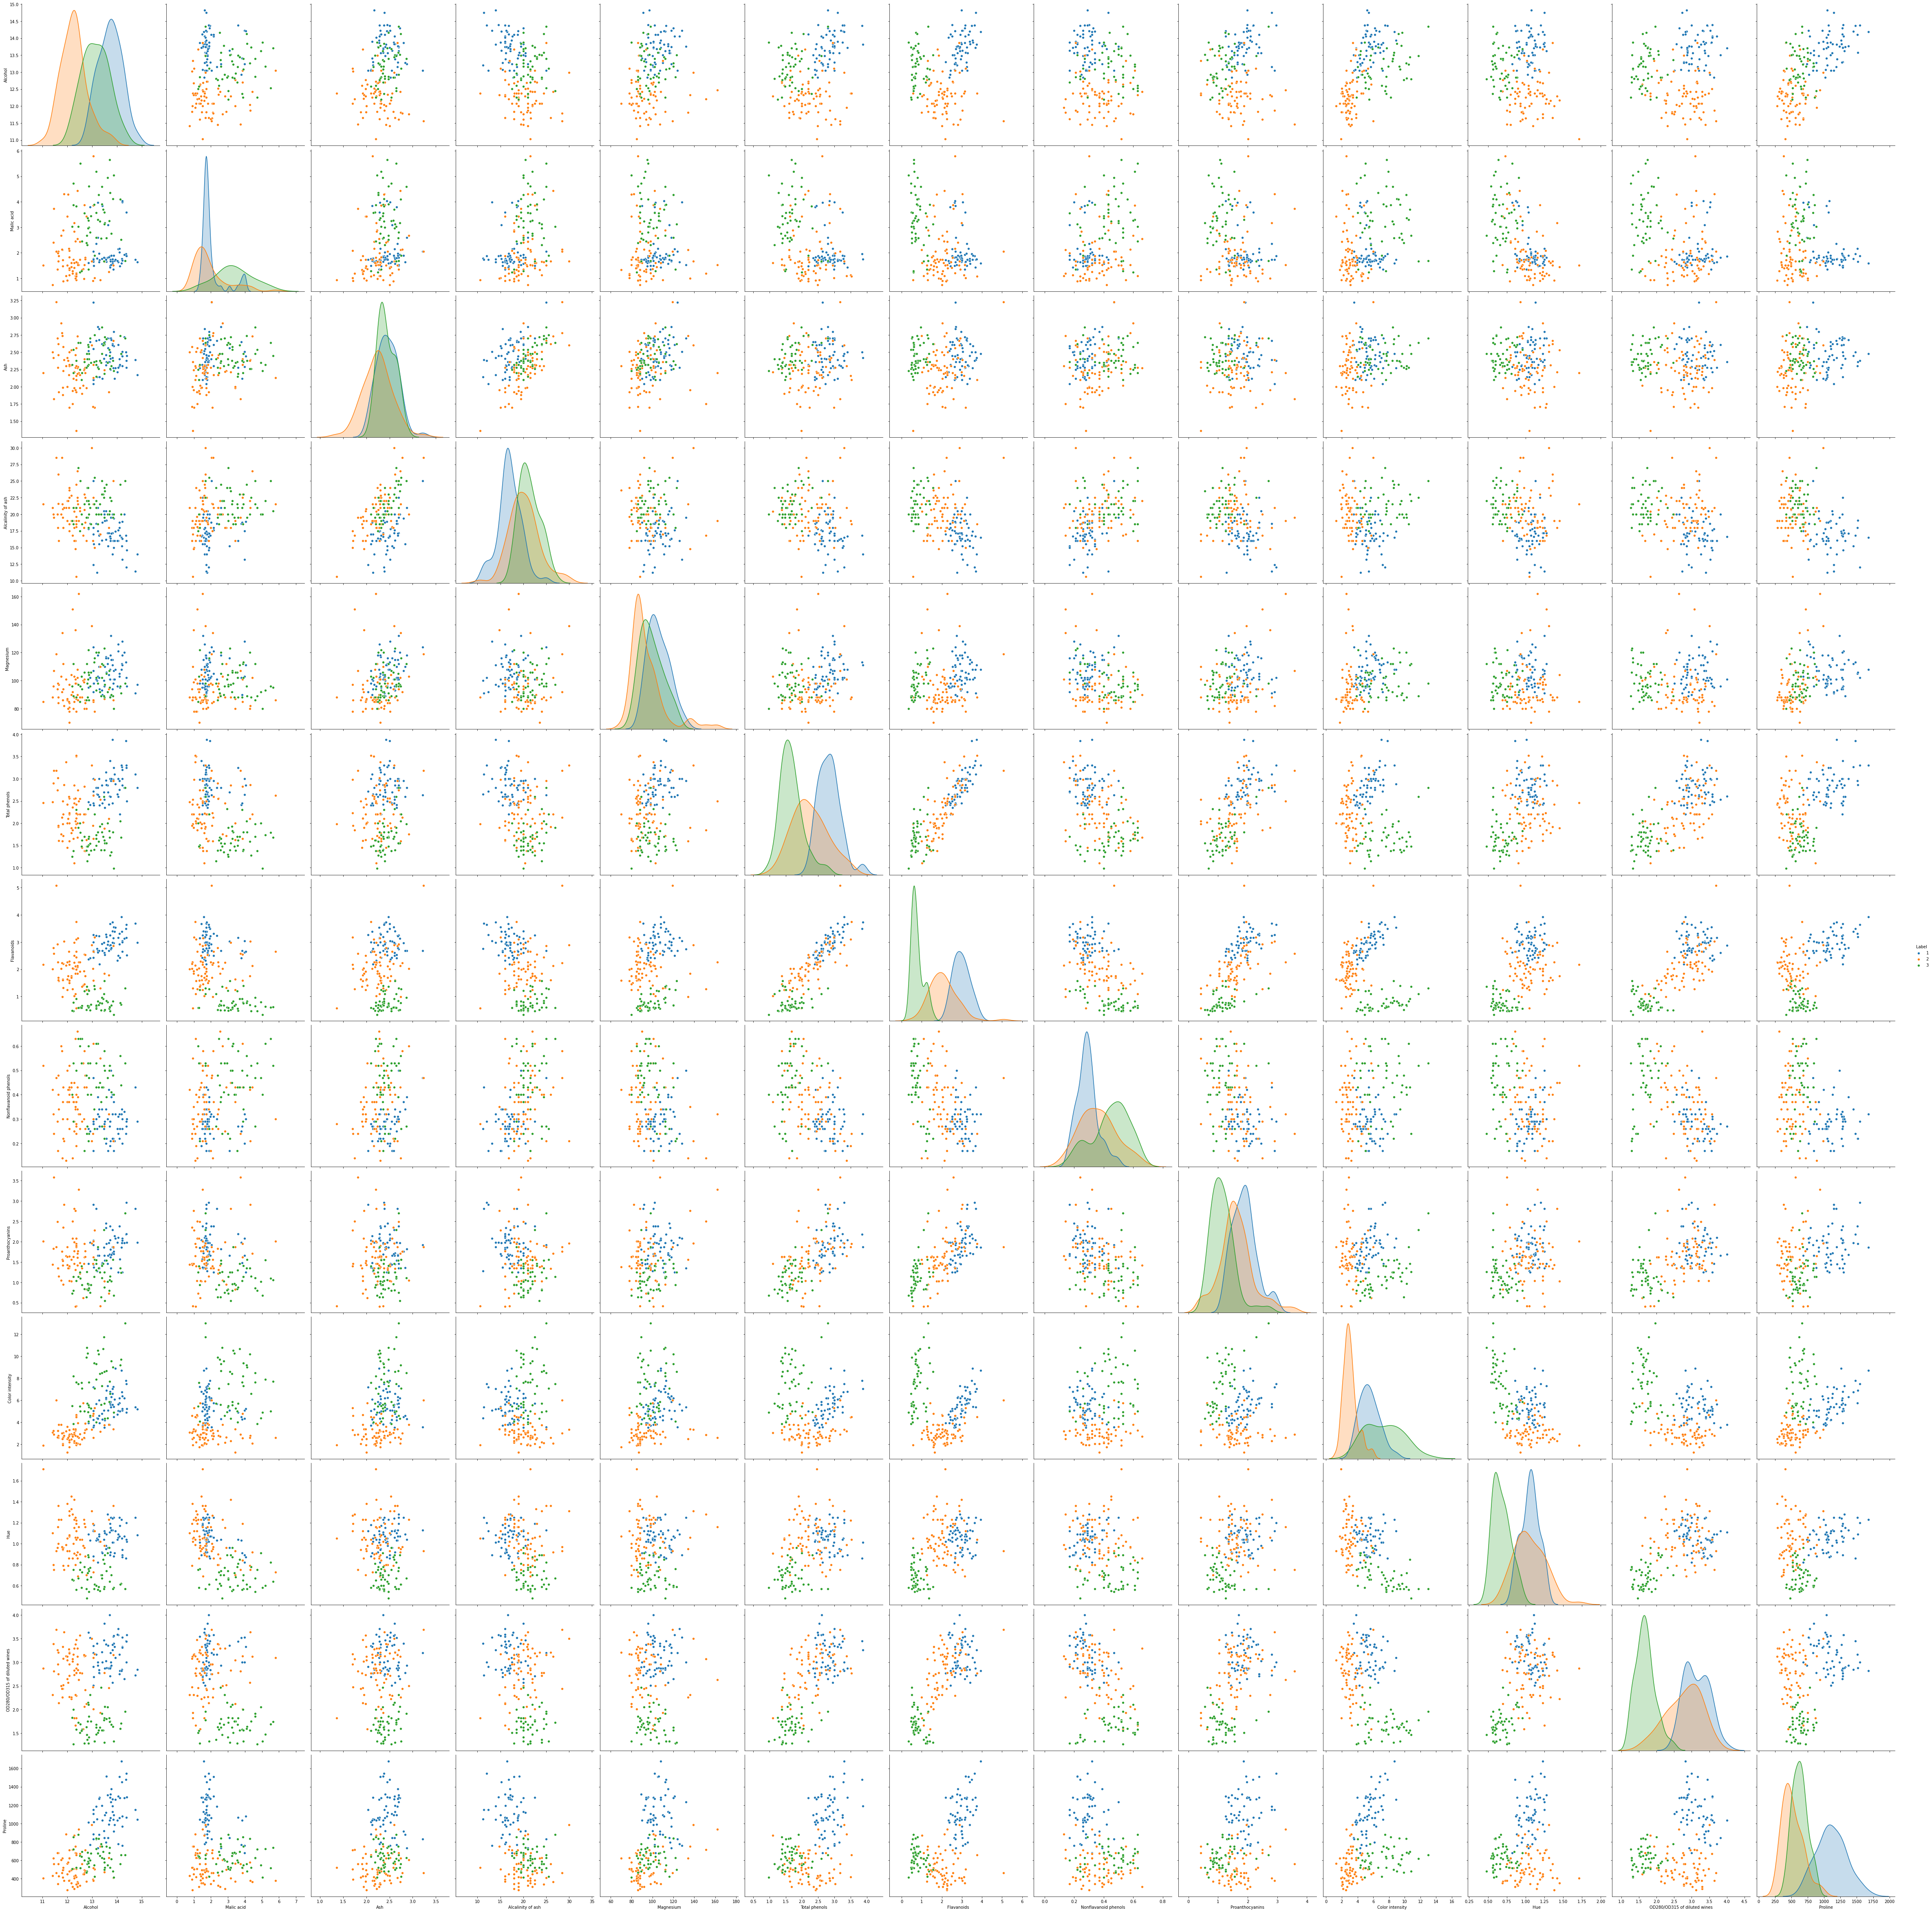

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# basic correlogram
sns.pairplot(wine, hue = 'Label', height=5)
plt.show()

From the plot we can see that the features are:

1. normally distributed
2. visibly apart from each other

---

##Analysis

### - Method #1 the *Naive Bayes Classifier*
Because the features are close to the normal distribution the first method I'm gonna use is the *Naive Bayes Classifier*, this classifier performs well on normally distributed data and if the distributions are situated apart from each other it will be much easier to distinguish among the three different classes.

In [0]:
# extract the labels 
wine_temp = wine.copy()

labels = wine_temp.pop('Label')

# split train-test
import sklearn 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine_temp, labels, test_size=0.3, random_state=1623)

After we have extracted the *labels* and splitted the data into *train* and *test* we can build the model.

In [0]:
# building the model 
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

Building this model is really easy, then we have to train it on the *train set* and we can see the accuracy in this particular set.

In [27]:
# train the model 
clf = clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))

0.9629629629629629


We have acheived a good score (0.963) with our seed. Now to have a more generalizable result we compute the accuracy using the *cross-validation*.

In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, wine_temp, labels, cv=10)

print(scores.mean())

0.9774509803921567


The accuracy using the cross-validation is even better.\
Let's try another method.

---

### Method #2 *Support Vector Machine*
Let's implement a support vector machine with hyperparameter tuning.

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=10, n_jobs = -1)

grid.fit(X_train, y_train)
pred = clf.predict(X_test)

print(f"accuracy score: {accuracy_score(y_test, pred)}\n")

Fitting 10 folds for each of 126 candidates, totalling 1260 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   35.8s


accuracy score: 0.9629629629629629



[Parallel(n_jobs=-1)]: Done 1260 out of 1260 | elapsed:  1.3min finished
